# Methylation of Genomic Features

In [2]:
library(tidyverse)
library(dplyr)
library(rtracklayer)
library(tibble)

library(ggvenn)

generate counts matrix for CG motifs, look for overlap with genomic features

we're looking at just where is methylation occuring in my samples

In [2]:
!CG_motif="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"

!input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences"

!output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/CG_coverage/"

In [ ]:
!bedtools multicov -bams *.bam -bed $CG_motif > ${output_dir}CG_coverage.csv

read in genomic features BED files

# Methylation level in gene features
I would like to know what percent of methylation is happening in exons/introns/etc. To do this, I'm going to use `bedtools multicov` to generate coverage files for each sample with bed files of the different gene features. Then, calculate the number of features with methylation and number without to get our methylation level.

In [1]:
!module load conda/latest

Removing conda
Loading conda


In [2]:
!conda activate bedtools


CondaError: Run 'conda init' before 'conda activate'



In [ ]:
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/"
exon_bed="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exon_sorted.bed"
intron_bed="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_intron.bed"
input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/"

In [ ]:
# hypoxic control
!HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

# control hypoxic
!CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

# hypoxic hypoxic 
!HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

# control control
!CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam") 


generate coverage file/counts matrix for each set of samples

## exons
(run in command line)

In [ ]:
# for all samples
!bedtools multicov -bams /project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/*.bam -bed $exon_bed > ${output_dir}multicov_exon.csv

In [ ]:
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/"

In [ ]:
# hypoxic control files
HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

bedtools multicov -bams "${HC_files[@]}" -bed $exon_bed > ${output_dir}HC_multicov_exon.csv

In [ ]:
# control hypoxic files
CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

bedtools multicov -bams "${CH_files[@]}" -bed $exon_bed > ${output_dir}CH_multicov_exon.csv

In [ ]:
# hypoxic hypoxic files
HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

bedtools multicov -bams "${HH_files[@]}" -bed $exon_bed > ${output_dir}HH_multicov_exon.csv

In [ ]:
# control control files
CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam")

bedtools multicov -bams "${CC_files[@]}" -bed $exon_bed > ${output_dir}CC_multicov_exon.csv

#### methylation level of exons

(11/20/2024) so this was done with running multicov on the exon bed file - but I've since changed the bed file so this is not accurate - running code again with fixed exon bed file

In [2]:
CC_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_multicov_exon.csv", sep='\t')
CH_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_multicov_exon.csv", sep='\t')
HC_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_multicov_exon.csv", sep='\t')
HH_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_multicov_exon.csv", sep='\t')

In [3]:
# CONTROL CONTROL

# Calculate average counts of last 5 columns
CC_exon$avg_counts <- rowMeans(CC_exon[, tail(names(CC_exon), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_exon[CC_exon$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CCmethyl_exon <- dim(CC_filtered)[1]
total_exon <- dim(CC_exon)[1]
CC_level <- round((CCmethyl_exon/total_exon)*100, 2)

print(paste(CCmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of CC:", (CCmethyl_exon)/(total_exon)*100))

[1] "69098 methylated exons and 731278 total exons"
[1] "exon methylation level of CC: 9.44893733983519"


In [4]:
# CONTROL HYPOXIC

# Calculate average counts of last 5 columns
CH_exon$avg_counts <- rowMeans(CH_exon[, tail(names(CH_exon), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_exon[CH_exon$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CHmethyl_exon <- dim(CH_filtered)[1]
total_exon <- dim(CH_exon)[1]
CH_level <- round((CHmethyl_exon/total_exon)*100, 2)

print(paste(CHmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of CH:", (CHmethyl_exon)/(total_exon)*100))

[1] "67823 methylated exons and 731278 total exons"
[1] "exon methylation level of CH: 9.27458504153003"


In [5]:
# HYPOXIC HYPOXIC

# Calculate average counts of last 5 columns
HH_exon$avg_counts <- rowMeans(HH_exon[, tail(names(HH_exon), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_exon[HH_exon$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HHmethyl_exon <- dim(HH_filtered)[1]
total_exon <- dim(HH_exon)[1]
HH_level <- round((HHmethyl_exon/total_exon)*100, 2)

print(paste(HHmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of HH:", (HHmethyl_exon)/(total_exon)*100))

[1] "74706 methylated exons and 731278 total exons"
[1] "exon methylation level of HH: 10.2158139585766"


In [6]:
# HYPOXIC CONTROL

# Calculate average counts of last 5 columns
HC_exon$avg_counts <- rowMeans(HC_exon[, tail(names(HC_exon), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_exon[HC_exon$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HCmethyl_exon <- dim(HC_filtered)[1]
total_exon <- dim(HC_exon)[1]
HC_level <- round((HCmethyl_exon/total_exon)*100, 2)

print(paste(HCmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of HC:", (HCmethyl_exon)/(total_exon)*100))

[1] "76720 methylated exons and 731278 total exons"
[1] "exon methylation level of HC: 10.4912222164485"


In [10]:
exon_me_level <- tibble(CC = CC_level, HC = HC_level, HH = HH_level, CH = CH_level)
exon_me_level

CC,HC,HH,CH
<dbl>,<dbl>,<dbl>,<dbl>
9.45,10.49,10.22,9.27


In [11]:
exon_df <- exon_me_level %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("ME_Level")) %>%  # rename the single column
  mutate(Sample = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

exon_df

ME_Level,Sample
<dbl>,<chr>
9.45,CC
10.49,HC
10.22,HH
9.27,CH


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


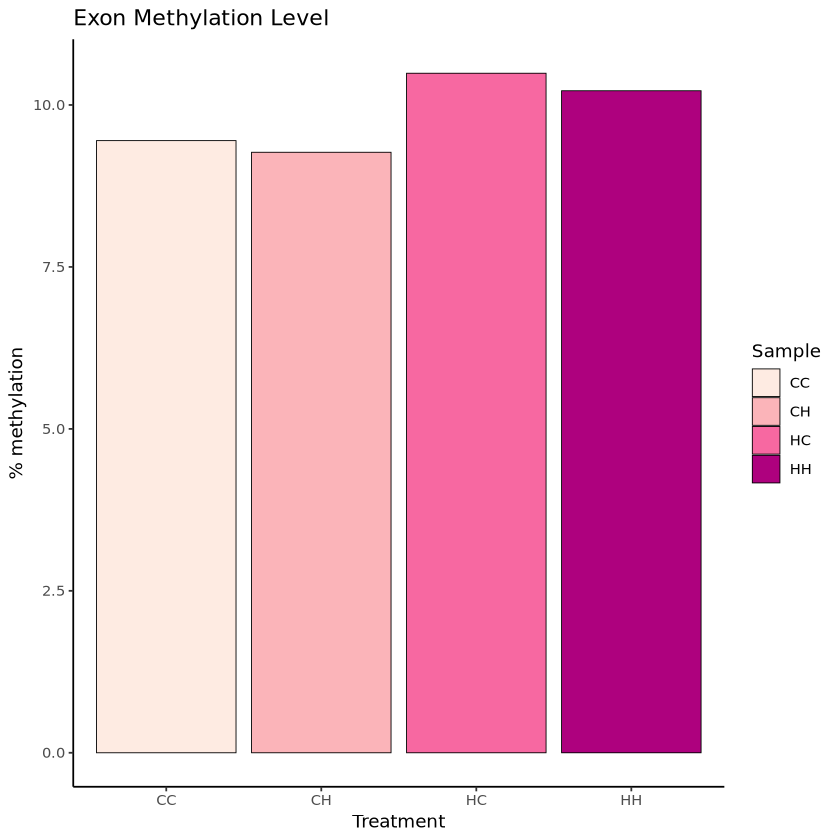

In [12]:
ggplot(exon_df, aes(x = Sample, y = ME_Level, fill = Sample)) +
  geom_bar(stat = "identity") +
scale_fill_brewer(palette = "RdPu",  direction = 1) +
geom_col(color = "black", size = 0.25) +
  labs(title = "Exon Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

In [13]:
p1c <- filter(exon_df, exon_df$Sample %in% c('CC','CH'))

p1h <- filter(exon_df, exon_df$Sample %in% c('HC','HH'))

t.test(p1c$ME_Level, p1h$ME_Level)


	Welch Two Sample t-test

data:  p1c$ME_Level and p1h$ME_Level
t = -6.1325, df = 1.7423, p-value = 0.03523
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.8020356 -0.1879644
sample estimates:
mean of x mean of y 
    9.360    10.355 


so the difference in methylation level of exons is statistically significant between first exposure to control vs. hypoxia

In [14]:
exon_df$phase1 <- ifelse(exon_df$Sample == 'CC', 'control',
                           ifelse(exon_df$Sample == 'CH', 'control', 'hypoxia'))

exon_df$phase2 <- ifelse(exon_df$Sample == 'CC', 'control',
                           ifelse(exon_df$Sample == 'HC', 'control', 'hypoxia'))

In [15]:
exon_df

ME_Level,Sample,phase1,phase2
<dbl>,<chr>,<chr>,<chr>
9.45,CC,control,control
10.49,HC,hypoxia,control
10.22,HH,hypoxia,hypoxia
9.27,CH,control,hypoxia


**overlap of methylated exons with other treatments?**

In [16]:
colnames(CC_filtered) <- c('chr','start', 'stop', '1', '2', '3', '4', '5')

CC_filtered$exon <- paste(CC_filtered$start, CC_filtered$stop, sep='_')

head(CC_filtered)

,chr,start,stop,1,2,3,4,5,exon
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
70,NC_035780.1,258108,259494,78,14,40,20,2,258108_259494
71,NC_035780.1,261478,262168,208,34,144,54,28,261478_262168
72,NC_035780.1,263244,265531,108,24,110,60,22,263244_265531
73,NC_035780.1,263245,265531,108,24,110,60,22,263245_265531
74,NC_035780.1,266196,266755,98,8,66,42,10,266196_266755
75,NC_035780.1,268626,268864,72,38,102,28,20,268626_268864


In [17]:
colnames(CH_filtered) <- c('chr','start', 'stop', '1', '2', '3', '4', '5')

CH_filtered$exon <- paste(CH_filtered$start, CH_filtered$stop, sep='_')

head(CH_filtered)

,chr,start,stop,1,2,3,4,5,exon
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
70,NC_035780.1,258108,259494,72,2,10,24,18,258108_259494
71,NC_035780.1,261478,262168,174,18,46,112,82,261478_262168
72,NC_035780.1,263244,265531,100,0,16,86,78,263244_265531
73,NC_035780.1,263245,265531,100,0,16,86,78,263245_265531
74,NC_035780.1,266196,266755,130,2,32,140,68,266196_266755
75,NC_035780.1,268626,268864,136,2,80,68,66,268626_268864


In [18]:
colnames(HC_filtered) <- c('chr','start', 'stop', '1', '2', '3', '4', '5')

HC_filtered$exon <- paste(HC_filtered$start, HC_filtered$stop, sep='_')

head(HC_filtered)

,chr,start,stop,1,2,3,4,5,exon
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
70,NC_035780.1,258108,259494,54,104,56,68,18,258108_259494
71,NC_035780.1,261478,262168,354,268,386,328,82,261478_262168
72,NC_035780.1,263244,265531,166,110,222,70,26,263244_265531
73,NC_035780.1,263245,265531,166,110,222,70,26,263245_265531
74,NC_035780.1,266196,266755,56,32,56,30,24,266196_266755
75,NC_035780.1,268626,268864,256,210,192,230,24,268626_268864


In [19]:
colnames(HH_filtered) <- c('chr','start', 'stop', '1', '2', '3', '4', '5')

HH_filtered$exon <- paste(HH_filtered$start, HH_filtered$stop, sep='_')

head(HH_filtered)

,chr,start,stop,1,2,3,4,5,exon
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
67,NC_035780.1,247019,247125,0,0,20,24,0,247019_247125
70,NC_035780.1,258108,259494,26,10,30,36,10,258108_259494
71,NC_035780.1,261478,262168,204,118,102,128,84,261478_262168
72,NC_035780.1,263244,265531,108,88,64,108,126,263244_265531
73,NC_035780.1,263245,265531,108,88,64,108,126,263245_265531
74,NC_035780.1,266196,266755,98,36,48,98,102,266196_266755


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


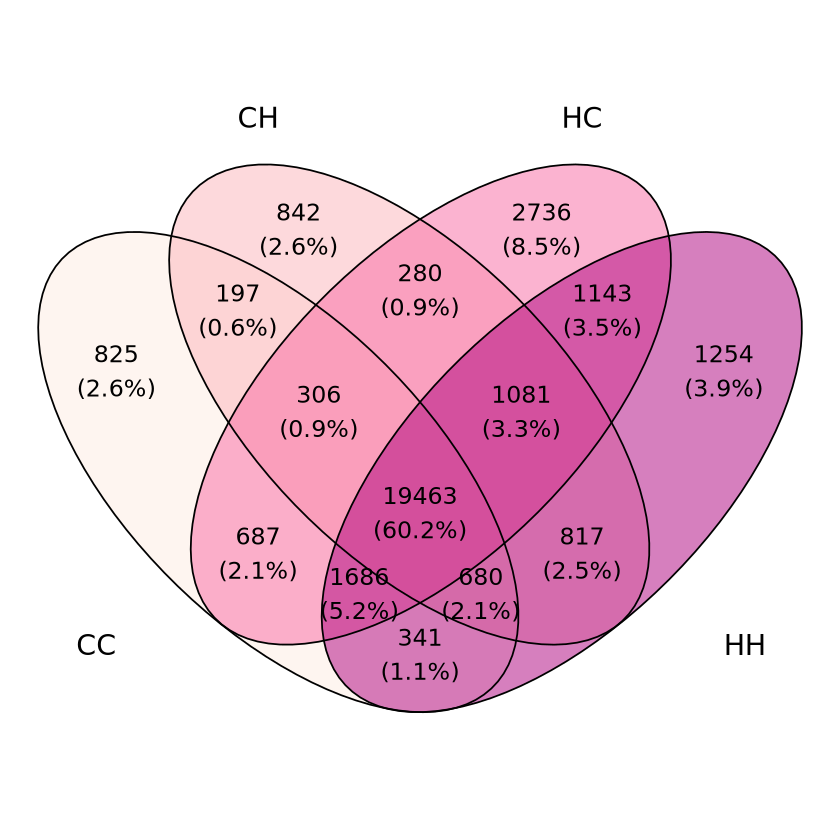

In [21]:
x = list(A = CC_filtered$exon,
         B = CH_filtered$exon, 
         C = HC_filtered$exon,
        D = HH_filtered$exon)

names(x) <- c('CC', 'CH', 'HC', 'HH')

exon_venn <- ggvenn(x,
      set_name_size = 6,
       text_size = 5,
      stroke_size = 0.5, 
       show_percentage = TRUE) + 
scale_fill_brewer(palette = "RdPu",  direction = 1)

exon_venn

In [22]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/exonMe_venn.pdf', exon_venn)

Saving 6.67 x 6.67 in image


#### methylation level of introns
run in command line

In [ ]:
# hypoxic control files
HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

bedtools multicov -bams "${HC_files[@]}" -bed $intron_bed > ${output_dir}HC_multicov_intron.csv

In [ ]:
# control hypoxic files
CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

bedtools multicov -bams "${CH_files[@]}" -bed $intron_bed > ${output_dir}CH_multicov_intron.csv

In [ ]:
# hypoxic hypoxic files
HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

bedtools multicov -bams "${HH_files[@]}" -bed $intron_bed > ${output_dir}HH_multicov_intron.csv

In [ ]:
# control control files
CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam")

bedtools multicov -bams "${CC_files[@]}" -bed $intron_bed > ${output_dir}CC_multicov_intron.csv

#### methylation level of introns

In [7]:
CC_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_multicov_intron.csv", sep='\t')
CH_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_multicov_intron.csv", sep='\t')
HC_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_multicov_intron.csv", sep='\t')
HH_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_multicov_intron.csv", sep='\t')

In [8]:
# CONTROL CONTROL

# Calculate average counts of last 5 columns
CC_intron$avg_counts <- rowMeans(CC_intron[, tail(names(CC_intron), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_intron[CC_intron$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CCmethyl_intron <- dim(CC_filtered)[1]
total_intron <- dim(CC_intron)[1]
CC_level_intron <- round((CCmethyl_intron/total_intron)*100, 2)

print(paste(CCmethyl_intron, "methylated introns and", total_intron, "total intons"))
print(paste("intron methylation level of CC:", (CCmethyl_intron)/(total_intron)*100))

[1] "12549 methylated introns and 311167 total intons"
[1] "intron methylation level of CC: 4.03288266429281"


In [9]:
# CONTROL HYPOXIC

# Calculate average counts of last 5 columns
CH_intron$avg_counts <- rowMeans(CH_intron[, tail(names(CH_intron), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_intron[CH_intron$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CHmethyl_intron <- dim(CH_filtered)[1]
total_intron <- dim(CH_intron)[1]
CH_level_intron <- round((CHmethyl_intron/total_intron)*100, 2)

print(paste(CHmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of CH:", (CHmethyl_intron)/(total_intron)*100))

[1] "12560 methylated introns and 311167 total introns"
[1] "intron methylation level of CH: 4.03641774352679"


In [10]:
# HYPOXIC HYPOXIC

# Calculate average counts of last 5 columns
HH_intron$avg_counts <- rowMeans(HH_intron[, tail(names(HH_intron), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_intron[HH_intron$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HHmethyl_intron <- dim(HH_filtered)[1]
total_intron <- dim(HH_intron)[1]
HH_level_intron <- round((HHmethyl_intron/total_intron)*100, 2)

print(paste(HHmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of HH:", (HHmethyl_intron)/(total_intron)*100))

[1] "14738 methylated introns and 311167 total introns"
[1] "intron methylation level of HH: 4.73636343185492"


In [11]:
# HYPOXIC CONTROL

# Calculate average counts of last 5 columns
HC_intron$avg_counts <- rowMeans(HC_intron[, tail(names(HC_intron), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_intron[HC_intron$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HCmethyl_intron <- dim(HC_filtered)[1]
total_intron <- dim(HC_intron)[1]
HC_level_intron <- round((HCmethyl_intron/total_intron)*100, 2)

print(paste(HCmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of HC:", (HCmethyl_intron)/(total_intron)*100))

[1] "15900 methylated introns and 311167 total introns"
[1] "intron methylation level of HC: 5.10979634729904"


In [12]:
intron_me_level <- tibble(CC = CC_level_intron, HC = HC_level_intron, HH = HH_level_intron, CH = CH_level_intron)
intron_me_level

CC,HC,HH,CH
<dbl>,<dbl>,<dbl>,<dbl>
4.03,5.11,4.74,4.04


In [13]:
intron_df <- intron_me_level %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("ME_Level")) %>%  # rename the single column
  mutate(Sample = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

intron_df

ME_Level,Sample
<dbl>,<chr>
4.03,CC
5.11,HC
4.74,HH
4.04,CH


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


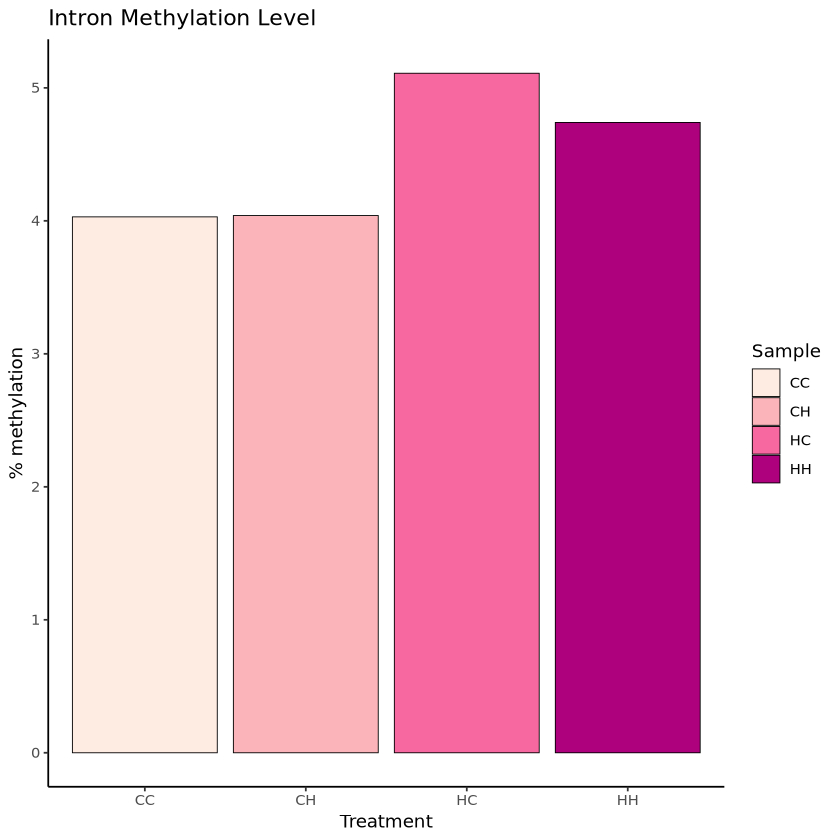

In [15]:
ggplot(intron_df, aes(x = Sample, y = ME_Level, fill = Sample)) +
  geom_bar(stat = "identity") +
geom_col(color = "black", size = 0.25) +
 scale_fill_brewer(palette = "RdPu", direction = 1) +
  labs(title = "Intron Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

# CG motif

In [8]:
CG_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CG_motif_multicov.csv', sep='\t')
dim(CG_multicov)
head(CG_multicov)

[1] 14458702       24

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4,X0.5,⋯,X0.10,X0.11,X0.12,X0.13,X0.14,X0.15,X0.16,X0.17,X0.18,X0.19
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
bam_files <- dir(path = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/", pattern = "^.*\\.bam$", full.names = FALSE, ignore.case = TRUE, all.files = TRUE)
bam_files

[1] "2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam"
 [3] "2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam"
 [5] "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam"
 [7] "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam"
 [9] "2018--BBR-BBY-B26-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam"
[11] "2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-BBB-W56-CV_sorted.bam"
[13] "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam"
[15] "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam"
[17] "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam"
[19] "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam"

In [10]:
# clean sample names
bam_files_clean <- gsub("^2018--|-CV_sorted\\.bam$", "", bam_files)
bam_files_clean

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[16] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"

In [11]:
colnames(CG_multicov) <- c('chromosome', 'start', 'stop', 'CG_motif', bam_files_clean)
head(CG_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,⋯,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Base columns
base_cols <- CG_multicov[, c("chromosome", "start", "stop", "CG_motif")]

########################################################################
## HYPOXIC CONTROL

# Additional columns matching pattern
HC_cols <- CG_multicov[, grepl("BB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HC_multicov <- cbind(base_cols, HC_cols)

write.csv(HC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv")

########################################################################
## HYPOXIC HYPOXIC

# Additional columns matching pattern
HH_cols <- CG_multicov[, grepl("BB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HH_multicov <- cbind(base_cols, HH_cols)

write.csv(HH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv")

########################################################################
## CONTROL HYPOXIC

# Additional columns matching pattern
CH_cols <- CG_multicov[, grepl("WB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CH_multicov <- cbind(base_cols, CH_cols)

write.csv(CH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv")

########################################################################
# CONTROL CONTROL

# Additional columns matching pattern
CC_cols <- CG_multicov[, grepl("WB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CC_multicov <- cbind(base_cols, CC_cols)

write.csv(CC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv")

########################################################################
head(HC_multicov)
head(HH_multicov)
head(CH_multicov)
head(CC_multicov)

## calculate *overall* methylation level

(number of methylated CG)/(total CG)

methylated CG being those that have an average of 5 sequences over the 5 sample replicates



In [24]:
# read in files so don't have to run code from above
CC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv')
CH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv')
HC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv')
HH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv')

**CONTROL CONTROL**

In [25]:
# Calculate average counts of last 5 columns
CC_multicov$avg_counts <- rowMeans(CC_multicov[,5:9])

# Remove rows with averages below 5
CC_filtered <- CC_multicov[CC_multicov$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL


############## methylation level ##############
CC_CGmethyl <- dim(CC_filtered)[1]
total_CG <- dim(CC_multicov)[1]

CCpercent_me <- round((CC_CGmethyl/total_CG)*100,2)
print(paste(CCpercent_me, "% of CpG dinucleotide is methylated"))


ERROR: Error in rowMeans(CC_multicov[, 5:9]): 'x' must be numeric


**CONTROL HYPOXIC**

In [41]:
# Calculate average counts of last 5 columns
CH_multicov$avg_counts <- rowMeans(CH_multicov[,5:9])

# Remove rows with averages below 5
CH_filtered <- CH_multicov[CH_multicov$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL


############## methylation level ##############
CH_CGmethyl <- dim(CH_filtered)[1]
total_CG <- dim(CH_multicov)[1]

CHpercent_me <- round((CH_CGmethyl/total_CG)*100,2)
print(paste(CHpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.77 % of CpG dinucleotide is methylated"


**HYPOXIC HYPOXIC**

In [42]:
# Calculate average counts of last 5 columns
HH_multicov$avg_counts <- rowMeans(HH_multicov[,5:9])

# Remove rows with averages below 5
HH_filtered <- HH_multicov[HH_multicov$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL


############## methylation level ##############
HH_CGmethyl <- dim(HH_filtered)[1]
total_CG <- dim(HH_multicov)[1]

HHpercent_me <- round((HH_CGmethyl/total_CG)*100,2)
print(paste(HHpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.9 % of CpG dinucleotide is methylated"


**HYPOXIC CONTROL**

In [43]:
# Calculate average counts of last 5 columns
HC_multicov$avg_counts <- rowMeans(HC_multicov[,5:9])

# Remove rows with averages below 5
HC_filtered <- HC_multicov[HC_multicov$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL


############## methylation level ##############
HC_CGmethyl <- dim(HC_filtered)[1]
total_CG <- dim(HC_multicov)[1]

HCpercent_me <- round((HC_CGmethyl/total_CG)*100,2)
print(paste(HCpercent_me, "% of CpG dinucleotide is methylated"))


[1] "1 % of CpG dinucleotide is methylated"


In [81]:
CpG_methyl <- tibble(
    CH = CHpercent_me,
    HH = HHpercent_me,
    HC = HCpercent_me,
    CC = CCpercent_me)

CpG_methyl <- CpG_methyl %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("percent_me")) %>%  # rename the single column
  mutate(treatment = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

CpG_methyl

percent_me,treatment
<dbl>,<chr>
0.77,CH
0.90,HH
1.00,HC
0.74,CC


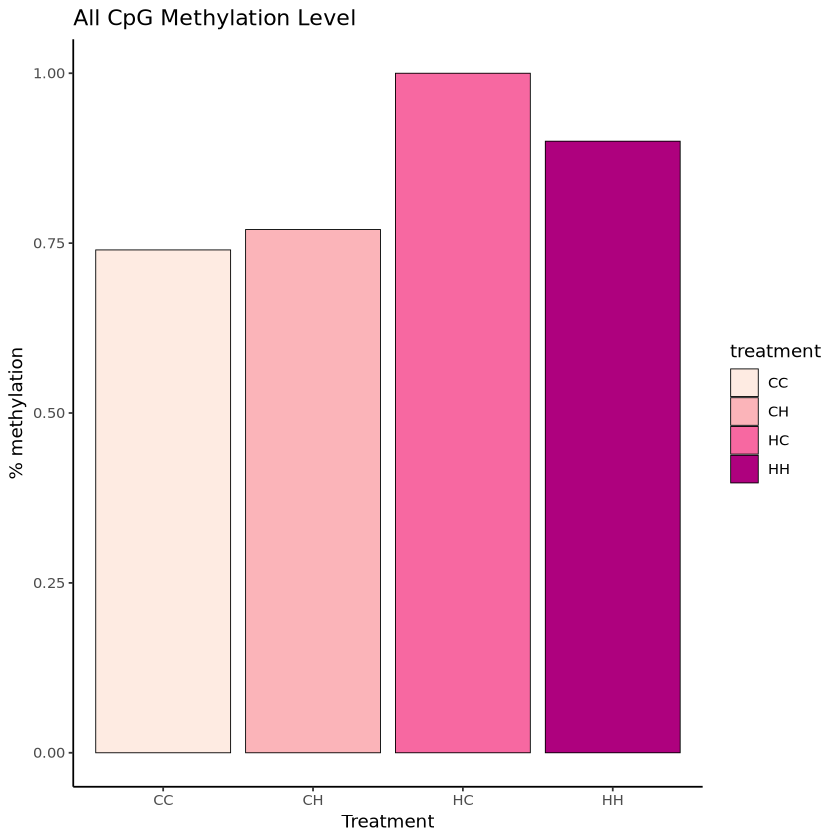

In [82]:
ggplot(CpG_methyl, aes(x = treatment, y = percent_me, fill = treatment)) +
  geom_bar(stat = "identity") +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
geom_col(color = "black", size = 0.25) +
  labs(title = "All CpG Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

In [30]:
cont <- c(CHpercent_me, CCpercent_me)
hyp <- c(HHpercent_me, HCpercent_me)

t.test(cont, hyp)


	Welch Two Sample t-test

data:  cont and hyp
t = -3.7355, df = 1.1786, p-value = 0.1363
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6621801  0.2721801
sample estimates:
mean of x mean of y 
    0.755     0.950 


**overlap of methylated exons between treatments**

To determine what exons are methylated in multiple treatments, going to plot a venn diagram. To do this, I am going to create a new column in the original treatment CpG multicov dataframe called 'gene' - this will be a concatenation of the start and stop columns so that I can have names for the exons to identify them in other treatments.

In [ ]:
CC_filtered$CpG <- paste(CC_filtered$start, CC_filtered$stop, sep='_')

head(CC_filtered)

In [45]:
CH_filtered$CpG <- paste(CH_filtered$start, CH_filtered$stop, sep='_')

head(CH_filtered)

,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30,exon
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
522,NC_035780.1,23615,23617,CG_motif,10,0,2,13,8,23615_23617
523,NC_035780.1,23620,23622,CG_motif,10,0,2,13,8,23620_23622
524,NC_035780.1,23624,23626,CG_motif,10,0,2,13,8,23624_23626
525,NC_035780.1,23631,23633,CG_motif,10,0,2,13,8,23631_23633
526,NC_035780.1,23638,23640,CG_motif,10,0,2,13,6,23638_23640
4684,NC_035780.1,198167,198169,CG_motif,32,0,6,16,30,198167_198169


In [46]:
HH_filtered$CpG <- paste(HH_filtered$start, HH_filtered$stop, sep='_')

head(HH_filtered)

,chromosome,start,stop,CG_motif,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,exon
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
375,NC_035780.1,17176,17178,CG_motif,4,4,6,14,2,17176_17178
430,NC_035780.1,20142,20144,CG_motif,4,12,4,2,6,20142_20144
431,NC_035780.1,20149,20151,CG_motif,4,12,4,2,6,20149_20151
432,NC_035780.1,20157,20159,CG_motif,8,12,6,4,10,20157_20159
433,NC_035780.1,20170,20172,CG_motif,8,12,6,4,10,20170_20172
518,NC_035780.1,23584,23586,CG_motif,10,10,2,6,12,23584_23586


In [47]:
CC_filtered$CpG <- paste(CC_filtered$start, CC_filtered$stop, sep='_')

head(CC_filtered)

,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12,exon
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
432,NC_035780.1,20157,20159,CG_motif,20,2,6,8,0,20157_20159
433,NC_035780.1,20170,20172,CG_motif,20,2,6,8,0,20170_20172
522,NC_035780.1,23615,23617,CG_motif,14,6,12,4,2,23615_23617
523,NC_035780.1,23620,23622,CG_motif,14,6,12,4,2,23620_23622
524,NC_035780.1,23624,23626,CG_motif,14,6,12,4,2,23624_23626
525,NC_035780.1,23631,23633,CG_motif,14,6,12,4,2,23631_23633


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


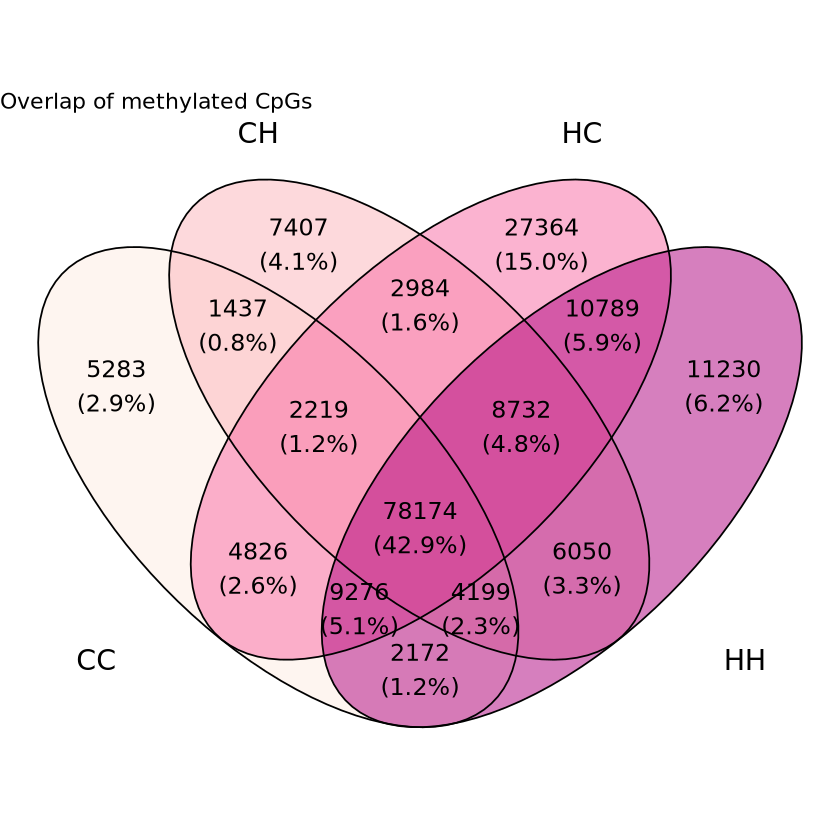

In [48]:
x = list(A = CC_filtered$CpG,
         B = CH_filtered$CpG, 
         C = HC_filtered$CpG,
        D = HH_filtered$CpG)

names(x) <- c('CC', 'CH', 'HC', 'HH')

cpg_venn <- ggvenn(x,
      set_name_size = 6,
       text_size = 5,
      stroke_size = 0.5, 
       show_percentage = TRUE) + 
scale_fill_brewer(palette = "RdPu",  direction = 1) + 
labs(title = "Overlap of methylated CpGs")

cpg_venn

In [ ]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_venn.pdf', cpg_venn)

## Methylation level by sample

The above code calculated methylation level by averaging across the 5 replicates per treatment *before* the analysis/bar plots - going to instead calculate methylation level for each replicate, then group into treatment so we can get more statistics (error bars etc.)

starting with:

### ind. methylation level of EXONS

General pipeline:
1. Grab the 5 columns for each replicate in the 'big' data frame
2. Only keep the exons that have at least 5 sequences for that replicate (choosing 5 based on 5x coverage used in Ventakamaran et al 2022) - calculate how many rows are kept 
3. Calculate methylation level based on this calculation: (methylated exons/total exons)x100


IF ALREADY RAN CODE ONCE, skip to bottom and load CSV

**control control**

In [4]:
# Assuming your dataframe is named 'df'
sample_columns <- CC_exon[, 4:ncol(CC_exon)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(sample_columns >= 5)

# Print the result
ML_cc

X0  X0.1  X0.2  X0.3  X0.4 
78514 42458 78979 55428 28635

In [5]:
total_exon <- dim(CC_exon)[1]
total_exon

[1] 731278

In [6]:
# create dataframe 
CCml_exon <- as.data.frame(ML_cc)

CCml_exon <- as.data.frame(CCml_exon[1:5,])

# assign replicate #'s
CCml_exon$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CCml_exon) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CCml_exon) <- NULL

# add treatment
CCml_exon$treatment <- 'CC'

CCml_exon

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
78514,1,CC
42458,2,CC
78979,3,CC
55428,4,CC
28635,5,CC


In [7]:
# calculate methylation level
CCml_exon$methyl_level <- round(((CCml_exon$methyl_count/total_exon)*100),2)

# reorder columns to make sense
CCml_exon <- select(CCml_exon, treatment, replicate, methyl_count, methyl_level)

CCml_exon

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CC,1,78514,10.74
CC,2,42458,5.81
CC,3,78979,10.80
CC,4,55428,7.58
CC,5,28635,3.92


**control hypoxic**

In [8]:
# Assuming your dataframe is named 'df'
sample_columns <- CH_exon[, 4:ncol(CH_exon)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(sample_columns >= 5)

# Print the result
ML_ch

X0  X0.1  X0.2  X0.3  X0.4 
74413 20653 48196 75422 61892

In [9]:
# create dataframe 
CHml_exon <- as.data.frame(ML_ch)
CHml_exon <- as.data.frame(CHml_exon[1:5,])

# assign replicate #'s
CHml_exon$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CHml_exon) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CHml_exon) <- NULL

# add treatment
CHml_exon$treatment <- 'CH'

CHml_exon

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
74413,1,CH
20653,2,CH
48196,3,CH
75422,4,CH
61892,5,CH


In [10]:
# calculate methylation level
CHml_exon$methyl_level <- round(((CHml_exon$methyl_count/total_exon)*100),2)

# reorder columns to make sense
CHml_exon <- select(CHml_exon, treatment, replicate, methyl_count, methyl_level)

CHml_exon

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CH,1,74413,10.18
CH,2,20653,2.82
CH,3,48196,6.59
CH,4,75422,10.31
CH,5,61892,8.46


**hypoxic hypoxic**

In [11]:
# Assuming your dataframe is named 'df'
sample_columns <- HH_exon[, 4:ncol(HH_exon)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(sample_columns >= 5)

# Print the result
ML_hh

X0  X0.1  X0.2  X0.3    X2 
73003 61895 66738 72082 71438

In [12]:
# create dataframe 
HHml_exon <- as.data.frame(ML_hh)
HHml_exon <- as.data.frame(HHml_exon[1:5,])

# assign replicate #'s
HHml_exon$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HHml_exon) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HHml_exon) <- NULL

# add treatment
HHml_exon$treatment <- 'HH'

HHml_exon

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
73003,1,HH
61895,2,HH
66738,3,HH
72082,4,HH
71438,5,HH


In [13]:
# calculate methylation level
HHml_exon$methyl_level <- round(((HHml_exon$methyl_count/total_exon)*100),2)

# reorder columns to make sense
HHml_exon <- select(HHml_exon, treatment, replicate, methyl_count, methyl_level)

HHml_exon

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
HH,1,73003,9.98
HH,2,61895,8.46
HH,3,66738,9.13
HH,4,72082,9.86
HH,5,71438,9.77


**hypoxic control**

In [14]:
# Assuming your dataframe is named 'df'
sample_columns <- HC_exon[, 4:ncol(HC_exon)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(sample_columns >= 5)

# Print the result
ML_hc

X0  X0.1  X0.2  X0.3  X0.4 
72299 71125 75499 71055 48816

In [15]:
# create dataframe 
HCml_exon <- as.data.frame(ML_hc)
HCml_exon <- as.data.frame(HCml_exon[1:5,])

# assign replicate #'s
HCml_exon$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HCml_exon) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HCml_exon) <- NULL

# add treatment
HCml_exon$treatment <- 'HC'

HCml_exon

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
72299,1,HC
71125,2,HC
75499,3,HC
71055,4,HC
48816,5,HC


In [16]:
# calculate methylation level
HCml_exon$methyl_level <- round(((HCml_exon$methyl_count/total_exon)*100),2)

# reorder columns to make sense
HCml_exon <- select(HCml_exon, treatment, replicate, methyl_count, methyl_level)

HCml_exon

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
HC,1,72299,9.89
HC,2,71125,9.73
HC,3,75499,10.32
HC,4,71055,9.72
HC,5,48816,6.68


In [17]:
exon_meLevel <- rbind(CCml_exon, CHml_exon, HCml_exon, HHml_exon)
exon_meLevel

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CC,1,78514,10.74
CC,2,42458,5.81
CC,3,78979,10.80
CC,4,55428,7.58
CC,5,28635,3.92
CH,1,74413,10.18
CH,2,20653,2.82
CH,3,48196,6.59
CH,4,75422,10.31


In [18]:
# create csv file so can skip the long code running above
write.csv(exon_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/exon_meLevel.csv')

In [6]:
exon_meLevel <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/exon_meLevel.csv')

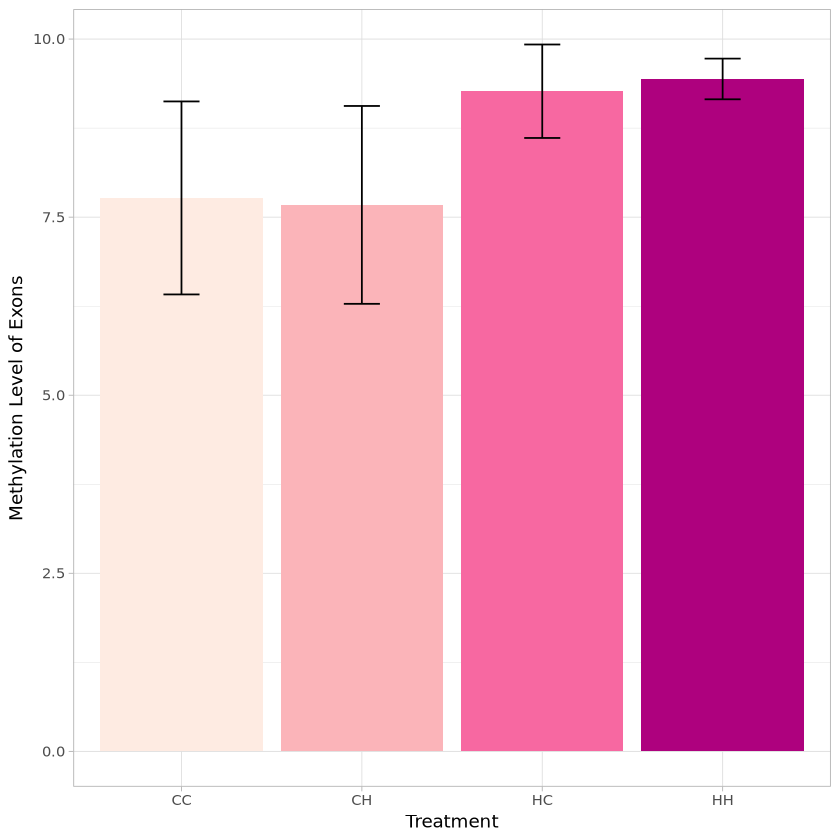

In [7]:
df_summary <- exon_meLevel %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
ggplot(df_summary, aes(x = treatment, y = mean_methyl_level, fill = treatment)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
#geom_col(color = "black", size = 0.25) +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
guides(fill = FALSE) +
  labs(x = "Treatment", y = "Methylation Level of Exons") +
  theme_light()


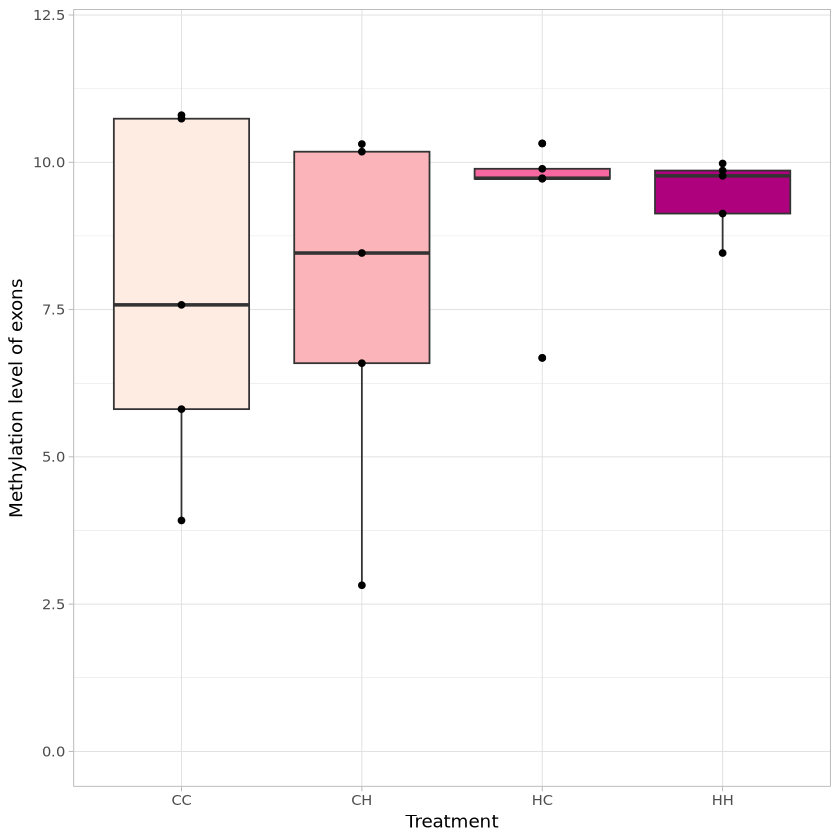

In [29]:
ggplot(exon_meLevel, aes(x = treatment, y = methyl_level, fill = treatment)) +
  geom_boxplot() +
geom_point() +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
ylim(0,12) +
guides(fill='none') +
  labs(x = "Treatment", y = "Methylation level of exons") +
  theme_light()


### ANOVA of exon methylation
want to know if the differences in exon methylation between treatments is statistically significant

following pipeline [here](https://www.sthda.com/english/wiki/one-way-anova-test-in-r)

In [55]:
# make copy of df
exons <- exon_meLevel

# set levels
exons$treatment <- ordered(exons$treatment,
                           levels = c('CC', 'CH', 'HC', 'HH'))

levels(exons$treatment)

[1] "CC" "CH" "HC" "HH"

In [57]:
# summary statistics
group_by(exons, treatment) %>%
summarise(count = n(),
          mean = mean(methyl_level, na.rm=TRUE),
          sd = sd(methyl_level, na.rm=TRUE)
          )

treatment,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
CC,5,7.770,3.0291088
CH,5,7.672,3.1057479
HC,5,9.268,1.4670617
HH,5,9.440,0.6390227


In [62]:
res.aov <- aov(methyl_level ~ treatment, data = exons)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
treatment    3  13.43   4.477   0.838  0.493
Residuals   16  85.53   5.345               

In [63]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ treatment, data = exons)

$treatment
        diff      lwr     upr     p adj
CH-CC -0.098 -4.28153 4.08553 0.9998871
HC-CC  1.498 -2.68553 5.68153 0.7379103
HH-CC  1.670 -2.51353 5.85353 0.6699304
HC-CH  1.596 -2.58753 5.77953 0.6995594
HH-CH  1.768 -2.41553 5.95153 0.6301686
HH-HC  0.172 -4.01153 4.35553 0.9993923


In [64]:
pairwise.t.test(exons$methyl_level, exons$treatment, p.adjust.method = 'BH')


	Pairwise comparisons using t tests with pooled SD 

data:  exons$methyl_level and exons$treatment 

   CC   CH   HC  
CH 0.95 -    -   
HC 0.48 0.48 -   
HH 0.48 0.48 0.95

P value adjustment method: BH 

**check the homogeneity of variance assumption**

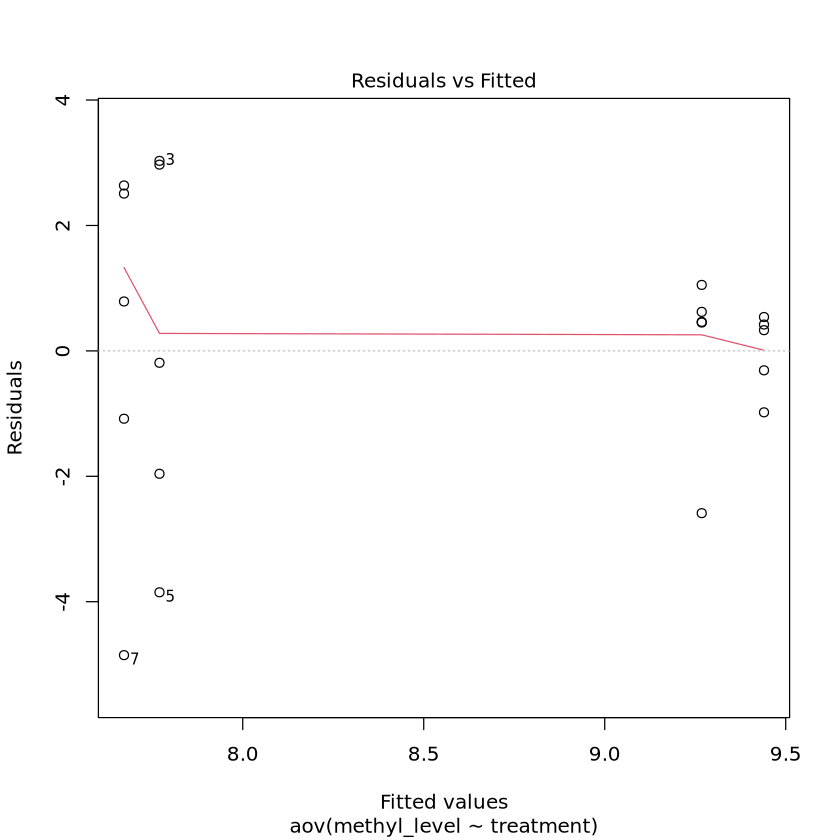

In [65]:
plot(res.aov,1)

In [67]:
library(car)

In [68]:
leveneTest(methyl_level ~ treatment, data = exons)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,2.264106,0.1202529
,16,NA,NA


from [source](https://www.sthda.com/english/wiki/one-way-anova-test-in-r): "...the p-value is not less than the significance level of 0.05. This means that there is no evidence to suggest that the variance across groups is statistically significantly different. Therefore, we can assume the homogeneity of variances in the different treatment groups."

**check the normality assumption**


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.93466, p-value = 0.1897


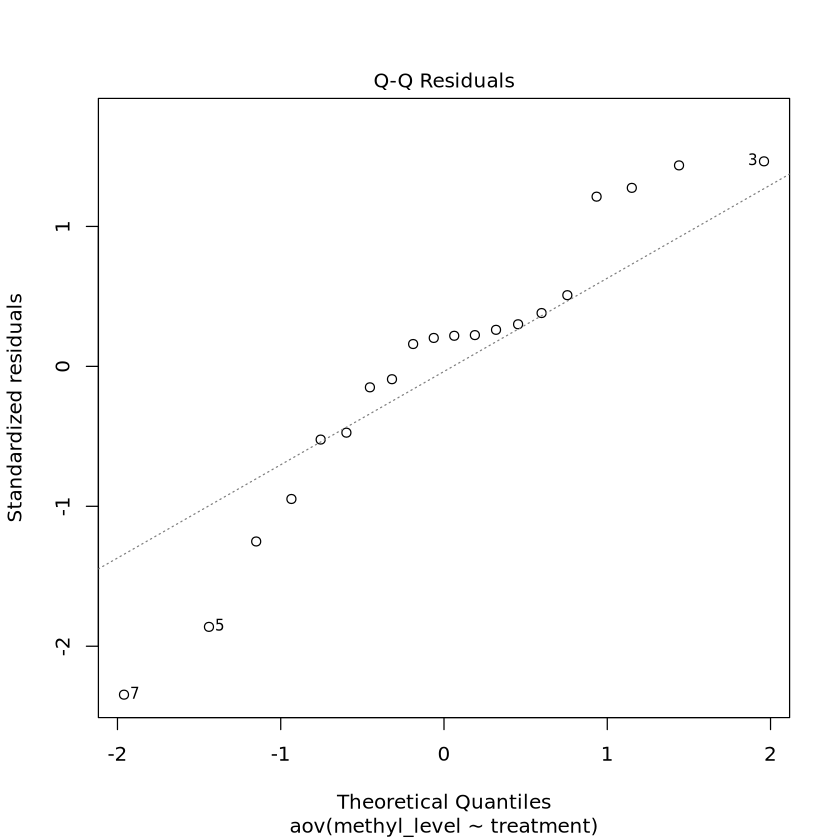

In [70]:
plot(res.aov, 2)

# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

so doesn't appear to be any statistically significant differences between methylation level for exons for the diff. treatments - I wonder if I collapse the data into two groups (first exposure to control and first exposure to hypoxia) if that changes anything?

In [85]:
# first 10 rows have a first exposure to control
exons[1:10,]$first_exp <- 'control'

# last 10 rows have a first exposure to hypoxia
exons[11:20,]$first_exp <- 'hypoxia'

exons

treatment,replicate,methyl_count,methyl_level,first_exp
<ord>,<dbl>,<dbl>,<dbl>,<chr>
CC,1,78514,10.74,control
CC,2,42458,5.81,control
CC,3,78979,10.80,control
CC,4,55428,7.58,control
CC,5,28635,3.92,control
CH,1,74413,10.18,control
CH,2,20653,2.82,control
CH,3,48196,6.59,control
CH,4,75422,10.31,control


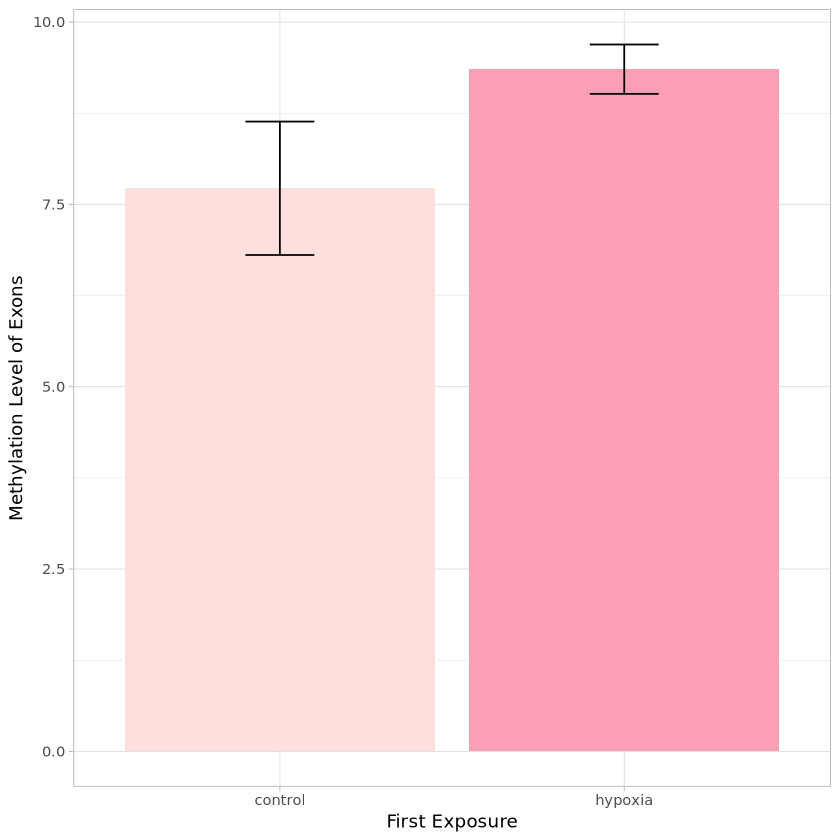

In [86]:
df_summary <- exons %>%
  group_by(first_exp) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
ggplot(df_summary, aes(x = first_exp, y = mean_methyl_level, fill = first_exp)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
#geom_col(color = "black", size = 0.25) +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
guides(fill = FALSE) +
  labs(x = "First Exposure", y = "Methylation Level of Exons") +
  theme_light()

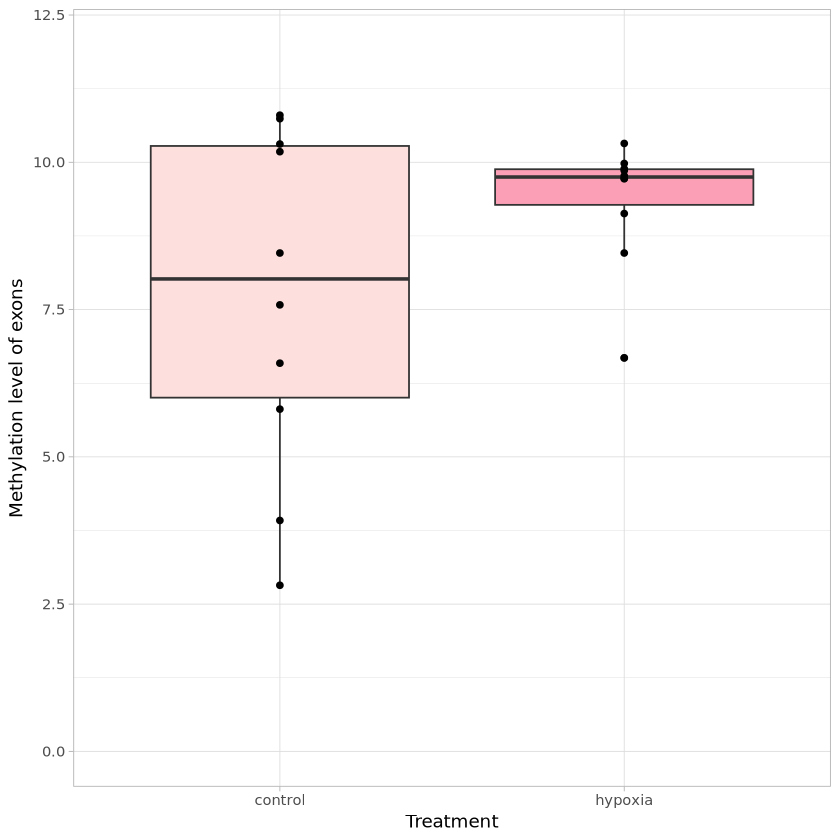

In [91]:
ggplot(exons, aes(x = first_exp, y = methyl_level, fill = first_exp)) +
  geom_boxplot() +
geom_point() +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
ylim(0,12) +
guides(fill='none') +
  labs(x = "Treatment", y = "Methylation level of exons") +
  theme_light()


so the two groups have overlap, but first exposure to hypoxia is a lot tigheter, less variation in the methylation level of exons

In [87]:
# set levels
exons$first_exp <- ordered(exons$first_exp,
                           levels = c('control', 'hypoxia'))

levels(exons$first_exp)

[1] "control" "hypoxia"

In [88]:
# summary statistics
group_by(exons, first_exp) %>%
summarise(count = n(),
          mean = mean(methyl_level, na.rm=TRUE),
          sd = sd(methyl_level, na.rm=TRUE)
          )

first_exp,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
control,10,7.721,2.892686
hypoxia,10,9.354,1.070641


In [89]:
res.aov <- aov(methyl_level ~ first_exp, data = exons)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
first_exp    1  13.33  13.333   2.803  0.111
Residuals   18  85.63   4.757               

In [90]:
pairwise.t.test(exons$methyl_level, exons$first_exp, p.adjust.method = 'BH')


	Pairwise comparisons using t tests with pooled SD 

data:  exons$methyl_level and exons$first_exp 

        control
hypoxia 0.11   

P value adjustment method: BH 

### ind. methylation level of CpGs
(if already ran code once, skip to bottom and load CSV)

**control control**

In [32]:
# Assuming your dataframe is named 'df'
sample_columns <- CC_multicov[, 4:ncol(CC_multicov)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(sample_columns >= 5)

# Print the result
ML_cc

stop    CG_motif WBB.WBV.W69 WBG.WBG.W44 WBO.WBV.W64 WBV.WBO.W23 
   14458702    14458702      147798       59287      137931       81789 
WBV.WBR.W12 
      33975

In [34]:
total_cg <- dim(CC_multicov)[1]
total_cg

[1] 14458702

In [37]:
# create dataframe 
CCml_cpg <- as.data.frame(ML_cc)

CCml_cpg <- as.data.frame(CCml_cpg[3:7,])

# assign replicate #'s
CCml_cpg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CCml_cpg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CCml_cpg) <- NULL

# add treatment
CCml_cpg$treatment <- 'CC'

CCml_cpg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
147798,1,CC
59287,2,CC
137931,3,CC
81789,4,CC
33975,5,CC


In [38]:
# calculate methylation level
CCml_cpg$methyl_level <- round(((CCml_cpg$methyl_count/total_cg)*100),2)

# reorder columns to make sense
CCml_cpg <- select(CCml_cpg, treatment, replicate, methyl_count, methyl_level)

CCml_cpg

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CC,1,147798,1.02
CC,2,59287,0.41
CC,3,137931,0.95
CC,4,81789,0.57
CC,5,33975,0.23


**control hypoxic**

In [39]:
# Assuming your dataframe is named 'df'
sample_columns <- CH_multicov[, 4:ncol(CH_multicov)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(sample_columns >= 5)

# Print the result
ML_ch

stop    CG_motif WBG.BBB.W56 WBO.BBR.W03 WBR.BBY.W25 WBY.BBV.W65 
   14458702    14458702      140077       24101       73538      136233 
WBY.BBY.W30 
     104170

In [40]:
# create dataframe 
CHml_cg <- as.data.frame(ML_ch)
CHml_cg <- as.data.frame(CHml_cg[3:7,])

# assign replicate #'s
CHml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(CHml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(CHml_cg) <- NULL

# add treatment
CHml_cg$treatment <- 'CH'

CHml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
140077,1,CH
24101,2,CH
73538,3,CH
136233,4,CH
104170,5,CH


In [41]:
# calculate methylation level
CHml_cg$methyl_level <- round(((CHml_cg$methyl_count/total_cg)*100),2)

# reorder columns to make sense
CHml_cg <- select(CHml_cg, treatment, replicate, methyl_count, methyl_level)

CHml_cg

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CH,1,140077,0.97
CH,2,24101,0.17
CH,3,73538,0.51
CH,4,136233,0.94
CH,5,104170,0.72


**hypoxic hypoxic**

In [42]:
# Assuming your dataframe is named 'df'
sample_columns <- HH_multicov[, 4:ncol(HH_multicov)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(sample_columns >= 5)

# Print the result
ML_hh

stop    CG_motif BBO.BBO.B16 BBO.BBY.B27 BBR.BBB.B50 BBR.BBG.B38 
   14458702    14458702      132674      105032      104681      134384 
BBR.BBY.B26 
     129732

In [43]:
# create dataframe 
HH_multicov <- as.data.frame(ML_hh)
HH_multicov <- as.data.frame(HH_multicov[3:7,])

# assign replicate #'s
HH_multicov$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HH_multicov) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HH_multicov) <- NULL

# add treatment
HH_multicov$treatment <- 'HH'

HH_multicov

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
132674,1,HH
105032,2,HH
104681,3,HH
134384,4,HH
129732,5,HH


In [44]:
# calculate methylation level
HH_multicov$methyl_level <- round(((HH_multicov$methyl_count/total_cg)*100),2)

# reorder columns to make sense
HH_multicov <- select(HH_multicov, treatment, replicate, methyl_count, methyl_level)

HH_multicov

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
HH,1,132674,0.92
HH,2,105032,0.73
HH,3,104681,0.72
HH,4,134384,0.93
HH,5,129732,0.90


**hypoxic control**

In [45]:
# Assuming your dataframe is named 'df'
sample_columns <- HC_multicov[, 4:ncol(HC_multicov)] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(sample_columns >= 5)

# Print the result
ML_hc

stop    CG_motif BBB.WBO.B21 BBB.WBV.B70 BBO.WBO.B16 BBO.WBV.B64 
   14458702    14458702      138394      136261      149013      136293 
BBY.WBG.B42 
      67842

In [46]:
# create dataframe 
HCml_cg <- as.data.frame(ML_hc)
HCml_cg <- as.data.frame(HCml_cg[3:7,])

# assign replicate #'s
HCml_cg$replicate <- c(1,2,3,4,5)

# rename columns
colnames(HCml_cg) <- c('methyl_count', 'replicate')

# reset rownames
rownames(HCml_cg) <- NULL

# add treatment
HCml_cg$treatment <- 'HC'

HCml_cg

methyl_count,replicate,treatment
<dbl>,<dbl>,<chr>
138394,1,HC
136261,2,HC
149013,3,HC
136293,4,HC
67842,5,HC


In [47]:
# calculate methylation level
HCml_cg$methyl_level <- round(((HCml_cg$methyl_count/total_cg)*100),2)

# reorder columns to make sense
HCml_cg <- select(HCml_cg, treatment, replicate, methyl_count, methyl_level)

HCml_cg

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
HC,1,138394,0.96
HC,2,136261,0.94
HC,3,149013,1.03
HC,4,136293,0.94
HC,5,67842,0.47


In [48]:
cg_meLevel <- rbind(CCml_cpg, CHml_cg, HCml_cg, HH_multicov)
cg_meLevel

treatment,replicate,methyl_count,methyl_level
<chr>,<dbl>,<dbl>,<dbl>
CC,1,147798,1.02
CC,2,59287,0.41
CC,3,137931,0.95
CC,4,81789,0.57
CC,5,33975,0.23
CH,1,140077,0.97
CH,2,24101,0.17
CH,3,73538,0.51
CH,4,136233,0.94


In [49]:
# create csv to avoid running long code above
write.csv(cg_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')

IF ALREADY RAN ABOVE CODE just load in csv:

In [4]:
cg_meLevel <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


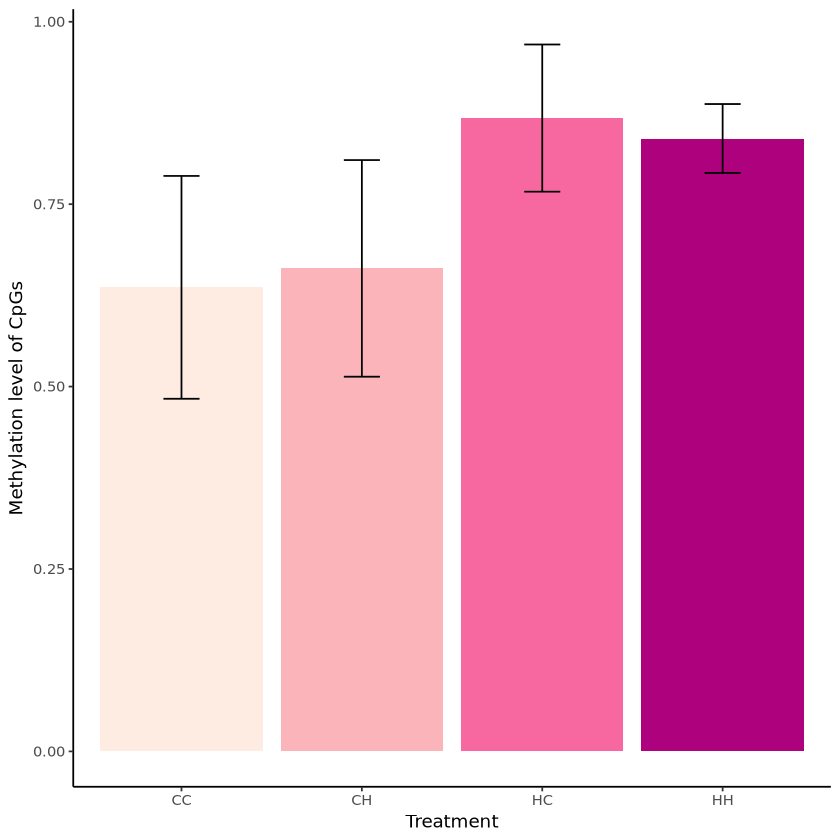

In [5]:
df_summary <- cg_meLevel %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
ggplot(df_summary, aes(x = treatment, y = mean_methyl_level, fill = treatment)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
guides(fill = FALSE) +
  labs(x = "Treatment", y = "Methylation level of CpGs") +
  theme_classic()


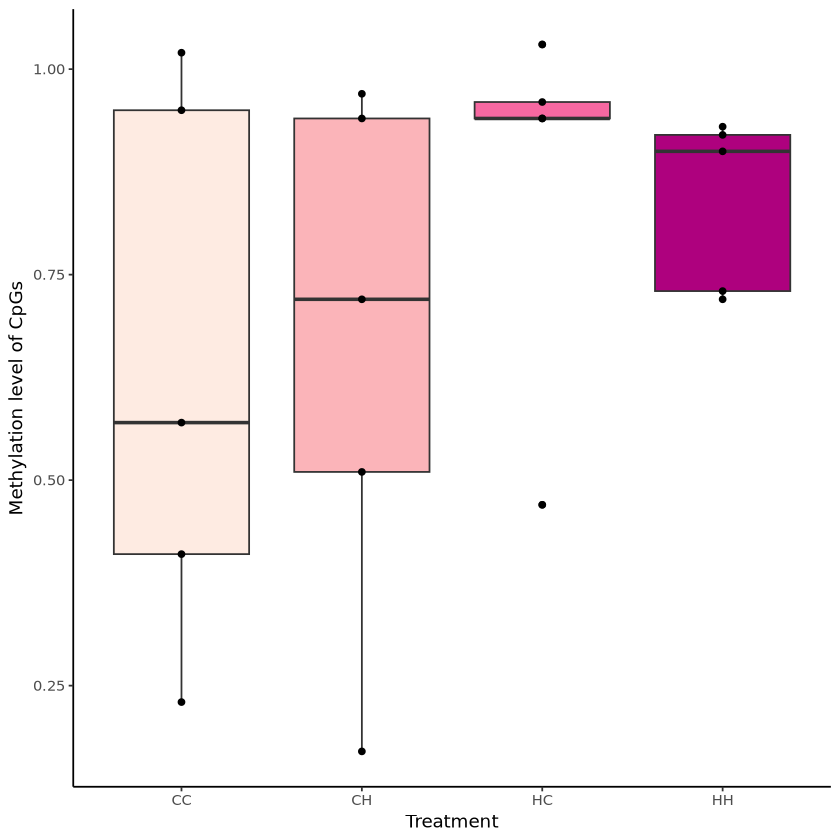

In [52]:
ggplot(cg_meLevel, aes(x = treatment, y = methyl_level, fill = treatment)) +
  geom_boxplot() +
geom_point() +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
guides(fill=FALSE) +
  labs(x = "Treatment", y = "Methylation level of CpGs") +
  theme_classic()


### ANOVA of CpG methylation
want to know if the differences in CpG methylation between treatments is statistically significant

following pipeline [here](https://www.sthda.com/english/wiki/one-way-anova-test-in-r)

In [71]:
# make copy of df
cpg <- cg_meLevel

# set levels
cpg$treatment <- ordered(cpg$treatment,
                           levels = c('CC', 'CH', 'HC', 'HH'))

levels(cpg$treatment)

[1] "CC" "CH" "HC" "HH"

In [72]:
# summary statistics
group_by(cpg, treatment) %>%
summarise(count = n(),
          mean = mean(methyl_level, na.rm=TRUE),
          sd = sd(methyl_level, na.rm=TRUE)
          )

treatment,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
CC,5,0.636,0.3414381
CH,5,0.662,0.3319187
HC,5,0.868,0.2255438
HH,5,0.840,0.1055936


In [73]:
res.aov <- aov(methyl_level ~ treatment, data = cpg)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
treatment    3 0.2138 0.07126   0.987  0.424
Residuals   16 1.1551 0.07219               

In [74]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ treatment, data = cpg)

$treatment
        diff        lwr       upr     p adj
CH-CC  0.026 -0.4601798 0.5121798 0.9986682
HC-CC  0.232 -0.2541798 0.7181798 0.5374580
HH-CC  0.204 -0.2821798 0.6901798 0.6353007
HC-CH  0.206 -0.2801798 0.6921798 0.6282900
HH-CH  0.178 -0.3081798 0.6641798 0.7248713
HH-HC -0.028 -0.5141798 0.4581798 0.9983394


In [75]:
pairwise.t.test(cpg$methyl_level, cpg$treatment, p.adjust.method = 'BH')


	Pairwise comparisons using t tests with pooled SD 

data:  cpg$methyl_level and cpg$treatment 

   CC   CH   HC  
CH 0.88 -    -   
HC 0.47 0.47 -   
HH 0.47 0.47 0.88

P value adjustment method: BH 

**check the homogeneity of variance assumption**

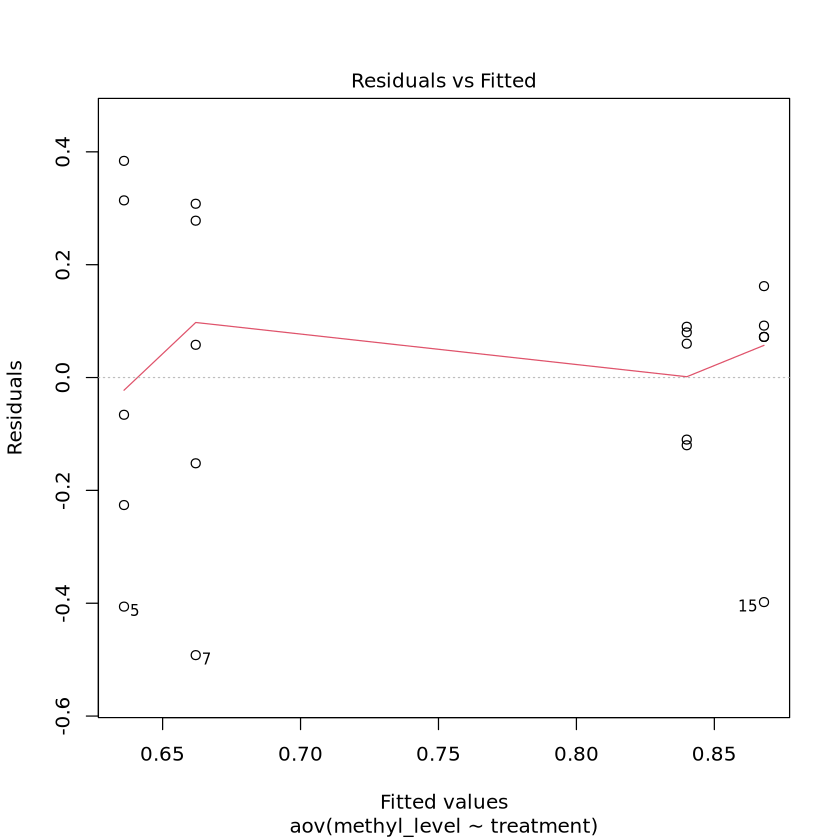

In [76]:
plot(res.aov,1)

In [77]:
leveneTest(methyl_level ~ treatment, data = cpg)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,1.428168,0.2713929
,16,NA,NA


from [source](https://www.sthda.com/english/wiki/one-way-anova-test-in-r): "...the p-value is not less than the significance level of 0.05. This means that there is no evidence to suggest that the variance across groups is statistically significantly different. Therefore, we can assume the homogeneity of variances in the different treatment groups."

**check the normality assumption**


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.94458, p-value = 0.2922


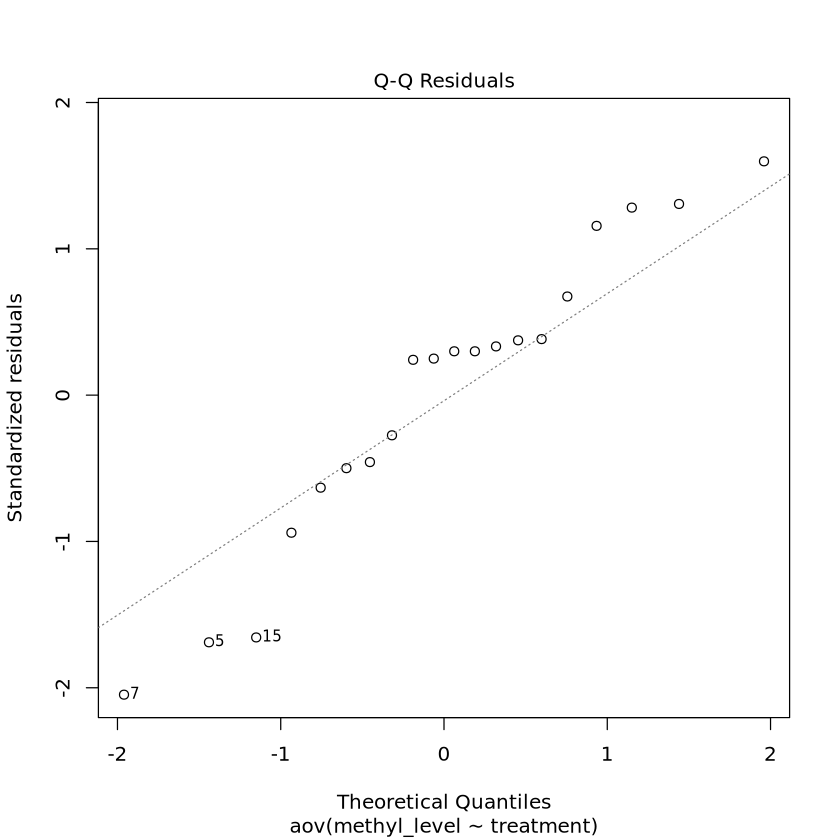

In [78]:
plot(res.aov, 2)

# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

so no statistically significant differences of methlyation levels for CpG dinucleotides between treatments